In [143]:
# https://deeplearningcourses.com/c/data-science-supervised-machine-learning-in-python
# https://www.udemy.com/data-science-supervised-machine-learning-in-python
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from datetime import datetime

%matplotlib inline

In [144]:
class Perceptron:
    def fit(self, X, Y, learning_rate=1.0, epochs=1000):

        # initialize random weights
        D = X.shape[1]
        self.w = np.random.randn(D)
        self.b = 0

        N = len(Y)
        costs = []
        for epoch in range(epochs):
            # determine which samples are misclassified, if any
            Yhat = self.predict(X)
            incorrect = np.nonzero(Y != Yhat)[0]
            if len(incorrect) == 0:
                # we are done!
                break

            # choose a random incorrect sample
            i = np.random.choice(incorrect)
            self.w += learning_rate*Y[i]*X[i]
            self.b += learning_rate*Y[i]

            # cost is incorrect rate
            c = len(incorrect) / float(N)
            costs.append(c)
        print("final b:", self.b, "epochs:", (epoch+1), "/", epochs)
        
        plt.plot(costs)
        plt.show()

    def predict(self, X):
        return np.sign(X.dot(self.w) + self.b)

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

In [145]:
    # get the mnist data
    def get_mnist(limit=None):
        print("Reading data...")
        df = pd.read_csv('datasets/train.csv')
        data = df.as_matrix()
        np.random.shuffle(data)
        X = data[:, 1:] / 255.0 # data is from 0..255
        Y = data[:, 0]
        if limit is not None:
            X, Y = X[:limit], Y[:limit]
        return X, Y

Reading data...
Training the model...
final b: -0.58 epochs: 1000 / 1000


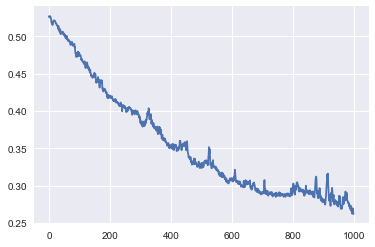

In [146]:
    # Pre-process the data
    X, Y = get_mnist(5000)
    Y[Y < 5] = -1
    Y[Y >= 5] = 1
    
    # Splitting the dataset into the Training set and Test set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)
    
    model = Perceptron()
    print("Training the model...")
    model.fit(X_train, y_train, learning_rate=0.01, epochs=1000)
    

Prediction is less than 5


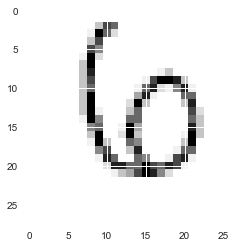

In [155]:
    val=np.random.randint(0, 499)
    pred=model.predict(X_test[val])
    xx=X_test[val].reshape(28,28)
    plt.imshow(xx)
    print("Prediction is", "greater than or equal to 5" if pred == 1 else "less than 5")

In [148]:
    print("MNIST test accuracy:", model.score(X_test, y_test))

MNIST test accuracy: 0.732
